# 10 Image Utilities

This notebook forms part of a series on [computational optical radiometry](https://github.com/NelisW/ComputationalRadiometry#computational-optical-radiometry-with-pyradi).  The notebooks can be downloaded from [Github](https://github.com/NelisW/ComputationalRadiometry#computational-optical-radiometry-with-pyradi). These notebooks are constantly revised and updated, please revisit from time to time.  


[<img src="https://zenodo.org/badge/doi/10.5281/zenodo.9910.png"   align="left"/>](http://dx.doi.org/10.5281/zenodo.9910)


The date of this document and module versions used in this document are given at the end of the file.  
Feedback is appreciated: neliswillers at gmail dot com.

## Overview

The pyradi module is not intended to provide a full-function image processing functionality.  If you require a comprehensive image processing capability consider
[scikit-image](http://scikit-image.org/),
[PIL](http://www.pythonware.com/products/pil/) (not actively developed anymore), or
[Pillow](https://pypi.python.org/pypi/Pillow/) (a PIL fork, actively developed). In fact, the functions described may use scikit-image internally.

Pyradi provides  several productivity-enhancing image utilities and a few unique functions not available elsewhere.  These functions are supplied to support the broader pyradi objectives.

In [1]:
from IPython.display import display
from IPython.display import Image
from IPython.display import HTML
%matplotlib inline
import numpy as np


## Loading multi-frame two-dimensional arrays from a raw binary data files

The [`ryfiles.readRawFrames`](http://nelisw.github.io/pyradi-docs/_build/html/ryfiles.html#pyradi.ryfiles.readRawFrames) function reads any number of two-dimensional array frames from a binary file with known data type.

The file must consist of multiple frames, all with the same number of rows and columns.  Frames of different data types can be read, according to the user specification.  The user can specify which frames must be loaded (if not the whole file).

The function signature is:  

    `readRawFrames(fname, rows, cols, vartype, loadFrames=[])`

- `fname (string)` filename.
- `rows (int)` number of rows in each frame.
- `cols (int)` number of columns in each frame.
- `vartype (np.dtype)` numpy data type of data to be read: int8, int16, int32, int64, uint8, uint16, uint32, uint64, float16, float32, float64.
- `loadFrames ([int])` list of frames to load, zero-based , empty list (default) loads all frames (optional).

The function returns:  

- `frames (int)` number of frames in the returned data set, 0 if error occurred.
- `rawShaped (np.ndarray)` vartype numpy array of dimensions (frames,rows,cols), None if error occurred.


## Saving a two-dimensional array as an image

The [`ryfiles.rawFrameToImageFile`](http://nelisw.github.io/pyradi-docs/_build/html/ryfiles.html#pyradi.ryfiles.rawFrameToImageFile) function saves the data in a two-dimensional array as an image.

The file type must be given, e.g. png or jpg. The image need not be scaled beforehand, it is done prior 
to writing out the image. Could be one of BMP, JPG, JPEG, PNG, PPM, TIFF, XBM, XPM) but the file types available depends on the imsave plugin in use.

The function signature is:  

    `rawFrameToImageFile(image, filename)`

- `image (np.ndarray)` two-dimensional array representing an image.
- `filename (string)` name of file to be written to, with extension.

## Reading a binary file and saving as image

In the following example a data file is downloaded from the internet. The data file contains 8 frames, each of 100 rows and 100 colummns. The data type is a four-byte unsigned long.  In the first case all the frames in the imge is loaded, in the second case only selected frames are loaded. The `loadFrames` list must provide a zero-based list of frames to be loaded.

In [2]:
import numpy as np

%reload_ext autoreload
%autoreload 2

import pyradi.ryfiles as ryfiles
import pyradi.ryutils as ryutils

tgzFilename = 'sample.tgz'
destinationDir = '.'
tarFilename = 'sample.tar'
url = 'https://raw.githubusercontent.com/NelisW/pyradi/master/pyradi/data/'
dlNames = ryfiles.downloadUntar(tgzFilename, url, destinationDir, tarFilename)
print('filesAvailable are {}'.format(dlNames))

if dlNames:
    frames, img1 = ryfiles.readRawFrames('sample.ulong', 100, 100, np.uint32)
    print('Number of frames read is {}'.format(frames))
    print('Array shape is {}'.format(img1.shape))
    frames, img2 = ryfiles.readRawFrames('sample.ulong', 100, 100, np.uint32, [1,3, 5])
    print('Number of frames read is {}'.format(frames))
    print('Array shape is {}'.format(img2.shape))

    if (img1[1] == img2[0]).all():
        print('\nimg1[1] == img2[0]')

    for i in range(frames):
        filename = 'img2{0}.{1}'.format(i,'png')
        print('Writing image {}'.format(filename))
        ryfiles.rawFrameToImageFile(img2[i],filename)  

W:\MyApps\pyradi\pyradi\ryfiles.py:567: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if data == None:
C:\Anaconda\lib\site-packages\skimage\util\dtype.py:107: UserWarning: Possible precision loss when converting from float64 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))


filesAvailable are ['sample.ulong']
Number of frames read is 8
Array shape is (8, 100, 100)
Number of frames read is 3
Array shape is (3, 100, 100)

img1[1] == img2[0]
Writing image img20.png
Writing image img21.png
Writing image img22.png


## Image sequence ordering

Image sequences are stored in three-dimensional arrays, in rows, columns and frames.
Not all libraries share the same sequencing, some store frames along axis=0 and 
others store frames along axis=2.  

The [`ryutils.framesFirst`](http://nelisw.github.io/pyradi-docs/_build/html/ryutils.html#pyradi.ryutils.framesFirst) function reorders an image sequence with frames along axis=2  to an image sequence with frames along axis=0. The [`ryutils.framesFirst`](http://nelisw.github.io/pyradi-docs/_build/html/ryutils.html#pyradi.ryutils.framesFirst) function uses `np.transpose(imageSequence, (2,0,1))`. The function signature is `framesFirst(imageSequence)` where `imageSequence` is the image sequence.  A view or a copy of the reordered sequence is returned.

The [`ryutils.framesLast`](http://nelisw.github.io/pyradi-docs/_build/html/ryutils.html#pyradi.ryutils.framesLast) function reorders an image sequence with frames along axis=0  to an image sequence with frames along axis=2. The [`ryutils.framesLast`](http://nelisw.github.io/pyradi-docs/_build/html/ryutils.html#pyradi.ryutils.framesLast) function uses `np.transpose(imageSequence, (1,2,0))`. The function signature is `framesLast(imageSequence)` where `imageSequence` is the image sequence.  A view or a copy of the reordered sequence is returned.

In [3]:
import pyradi.ryutils  as ryutils

a = np.ones((1,2,3))
print(a.shape)
b = ryutils.framesFirst(a)
print(b.shape)
c = ryutils.framesLast(b)
print(c.shape)

(1, 2, 3)
(3, 1, 2)
(1, 2, 3)


## Image histogram equalisation

pyradi is not meant to be an image processing package, but a histogram equalisation capability is included as a support for plotting tasks.  The [ryplot.ProcessImage](http://nelisw.github.io/pyradi-docs/_build/html/ryplot.html#pyradi.ryplot.ProcessImage) class contains the function [ryplot.ProcessImage.compressEqualizeImage](http://nelisw.github.io/pyradi-docs/_build/html/ryplot.html#pyradi.ryplot.ProcessImage.compressEqualizeImage) to do histogram equalisation.  This function has a unique feature in that it returns a set of colourbar values and labels, which *retains the original data set levels*, so that the true original input values can be read off on the colourbar.

Compress an image (and then inversely expand the color bar values), prior to histogram equalisation to ensure that the two keep in step,  we store the compression function names as pairs, and invoke the compression function as follows:  linear, log. sqrt.  Note that the image is histogram equalised in all cases.

There are three compression functions available: Linear, Natural Log, and Square Root. Different datasets equalise differently with the different compressors.  Experiment and find the most appropriate for your data set.

    compressSet = [
               [lambda x : x , lambda x : x, 'Linear'],
               [np.log,  np.exp, 'Natural Log'],
               [np.sqrt,  np.square, 'Square Root']
               ]

The function signature is 
`compressEqualizeImage(image, selectCompressSet=2, numCbarlevels=20, cbarformat='.3f')`

- `image (np.ndarray)`  the image to be processed.
- `selectCompressSet (int)` compression selection [0,1,2] (optional).
- `numCbarlevels (int)` number of labels in the colourbar (optional).
- `cbarformat (string)` colourbar label format, e.g., '10.3f', '.5e' (optional).

The [ryplot.ProcessImage.compressEqualizeImage](http://nelisw.github.io/pyradi-docs/_build/html/ryplot.html#pyradi.ryplot.ProcessImage.compressEqualizeImage) function returns a tuple, where the first element is the compressed image and the second element is a zip of colourbar levels and associated colourbar labels.


In the following example a data set is histogram-equalised and compared to the original input dataset.  On the second figure, note the non-linear scale on the colourbar; [ryplot.ProcessImage.compressEqualizeImage](http://nelisw.github.io/pyradi-docs/_build/html/ryplot.html#pyradi.ryplot.ProcessImage.compressEqualizeImage) keeps track of the original levels and even though the image is compressed, the colourbar still shows the original input values.

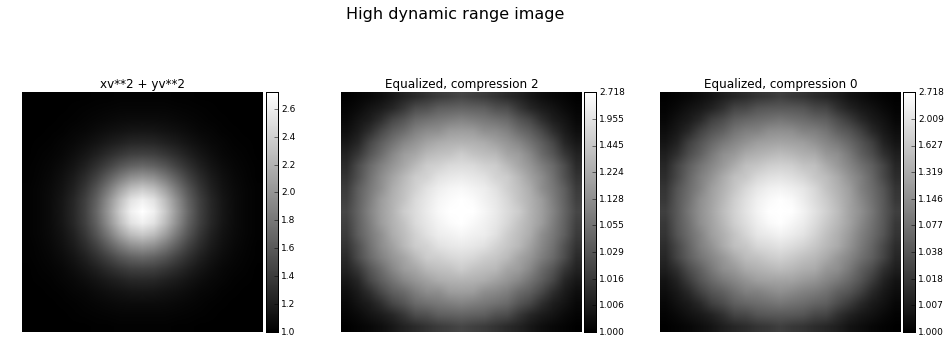

In [4]:
# %reload_ext autoreload
# %autoreload 2

import pyradi.ryplot as ryplot
from matplotlib import cm

import matplotlib.pyplot as plt

xv,yv = np.mgrid[-2:2:21j, -2:2:21j]
z = np.exp(np.exp(-(xv**2 + yv**2)))
I = ryplot.Plotter(4, 1, 3,'High dynamic range image', figsize=(16,6))
I.showImage(1, z, ptitle='xv**2 + yv**2', titlefsize=12,  cbarshow=True, cbarorientation = 'vertical', 
            cbarfontsize = 9)
ip = ryplot.ProcessImage()
zz, customticksz = ip.compressEqualizeImage(z, 2, 10)
I.showImage(2, zz, ptitle='Equalized, compression 2', titlefsize=12,  cbarshow=True, cbarorientation = 'vertical', 
            cbarcustomticks=customticksz, cbarfontsize = 9)
zz0, customticksz0 = ip.compressEqualizeImage(z, 0, 10)
I.showImage(3, zz0, ptitle='Equalized, compression 0', titlefsize=12,  cbarshow=True, cbarorientation = 'vertical', 
            cbarcustomticks=customticksz0, cbarfontsize = 9)


## Three dimensional noise analysis

The [`pyradi.ry3dnoise`](http://nelisw.github.io/pyradi-docs/_build/html/ry3dnoise.html#module-pyradi.ry3dnoise) module provides a set of functions to aid in the calculation of 3D noise parameters from
noise images. The functions are based on the work done by John D'Agostino and Curtis Webb.
For details see "3-D Analysis Framwork and Measurement Methodology for Imaging System
Nioise" p110-121 in "Infrared Imaging Systems: Design, Analysis, Modelling, and Testing II",
Holst, G. C., ed., Volume 1488, SPIE (1991), DOI 10.1117/12.45794.

The three-dimensional noise analysis requires a sequence of images. The functions all receive an `numpy.ndarray[frames][rows][cols]` as first argument, where the array is a three-dimensional sequence of images.  The functions in this module are:

- `getNT(imgSeq)` Average for all pixels as a function of time/frames. Represents noise which consists of fluctuations in the temporal direction affecting the mean of each frame. Returns the noise (double), frame-to-frame intensity variation.
- `getNVH(imgSeq)` Average over all frames, for each pixel. Represents non-uniformity spatial noise that does not change from frame-to-frame. Returns the noise (double), fixed spatial noise.
- `getNTV(imgSeq)` Average for each row and frame over all columns. Represents variations in row averages that change from frame-to-frame.  Returnsthe  noise (double), row temporal noise.
- `getNTH(imgSeq)` Average for each column and frame over all rows. Represents variations in column averages that change from frame-to-frame. Returnsthe noise (double), column temporal noise.
- `def getNV(imgSeq)` Average for each column over all frames and rows. Represents variations in row averages that are fixed in time.  Returns the noise (double), fixed row noise.
- `getNH(imgSeq)` Average for each row over all frames and cols. Represents variations in column averages that are fixed in time. Returns the noise (double), fixed column noise.
- `getNTVH(imgSeq)`Noise for each row,  frame and column. Represents random noise in the detector and electronics. Returns the noise (double), temporal pixel noise.
- `getTotal(imgSeq)` Total system noise. Returns the noise (double), total system noise.  

The following example reads a file with an image sequence, and proceeds to calculate the three-dimensional noise parameters.

filesAvailable are ['sensornoise.raw']

(19, 100, 100) (frames, rows,cols) processed from sensornoise.raw - see results in sensornoise.txt


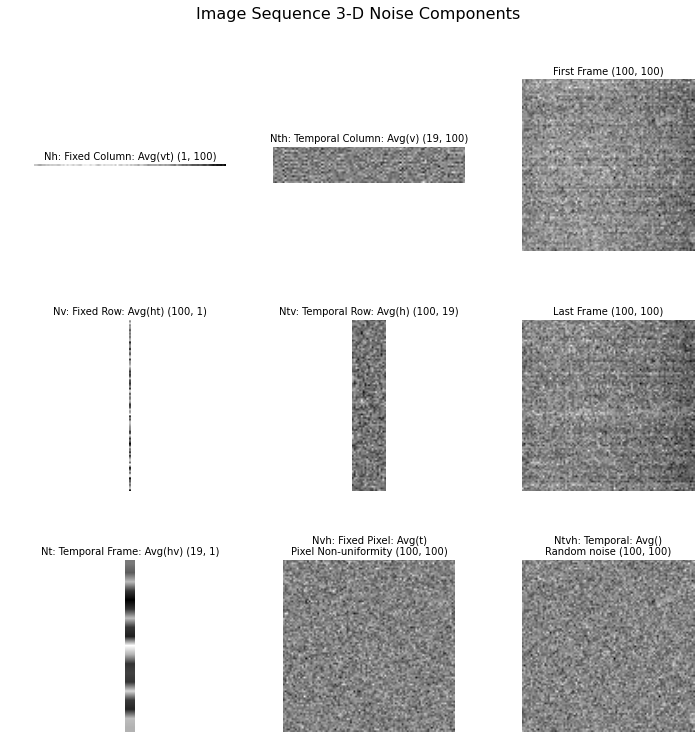

In [5]:
import pyradi.ry3dnoise as ry3dnoise

tgzFilename = 'sensornoise.tgz'
destinationDir = '.'
tarFilename = 'sensornoise.tar'
url = 'https://raw.githubusercontent.com/NelisW/pyradi/master/pyradi/data/'
dlNames = ryfiles.downloadUntar(tgzFilename, url, destinationDir, tarFilename)
print('filesAvailable are {}'.format(dlNames))

if dlNames:
    rows = 100
    cols = 100
    outfilename = 'sensornoise.txt'

    framesToLoad = range(1, 21, 1)
    frames, img    = ryfiles.readRawFrames(dlNames[0], rows, cols, np.uint16, framesToLoad)

    if frames > 0:
        P = ryplot.Plotter(1, 1, 1,'Simulated noise', figsize=(12, 8))
        P.showImage(1, img[0])
        P.saveFig('rawframe0.png')

        outfile = open(outfilename, 'w')
        outfile.write('\n{0} Frames read from {1}\n'.format(frames, dlNames[0]))
        outfile.write('\nImage average S       : {0:10.3f} \n'.format(ry3dnoise.getS(img)))
        outfile.write('Total system noise    : {0:10.3f} \n\n'.format(ry3dnoise.getTotal(img)))
        outfile.write('Fixed/spatial noise  | Temporal noise      | Variation effect\n')
        outfile.write('---------------------|---------------------|-----------------\n')
        outfile.write('Nh    : {0:10.3f}   | Nth   : {1:10.3f}  | Column \n'.format(ry3dnoise.getNH(img)[0],ry3dnoise.getNTH(img)[0]))
        outfile.write('Nv    : {0:10.3f}   | Ntv   : {1:10.3f}  | Row \n'.format(ry3dnoise.getNV(img)[0],ry3dnoise.getNTV(img)[0]))
        outfile.write('Nvh   : {0:10.3f}   | Ntvh  : {1:10.3f}  | Pixel \n'.format(ry3dnoise.getNVH(img)[0],ry3dnoise.getNTVH(img)[0]))
        outfile.write('                     | Nt    : {0:10.3f}  | Frame \n'.format(ry3dnoise.getNT(img)[0]))

        print('\n({0}, {3}, {4}) (frames, rows,cols) processed from {1} - see results in {2}'.format(frames, dlNames[0], outfilename,rows,cols))

    else:
        print('Error in reading noise images data')

    import os.path    
    if os.path.sep == '/':
        !cat sensornoise.txt
    else:
        !type sensornoise.txt    

    NH = ry3dnoise.getNH(img)[1].reshape(cols).reshape(1,cols)
    NTH = ry3dnoise.getNTH(img)[1].reshape(frames*cols).reshape(frames,cols)
    NV = ry3dnoise.getNV(img)[1].reshape(rows).reshape(rows,1)
    NTV = ry3dnoise.getNTV(img)[1].reshape(frames*rows).reshape(rows,frames)
    NVH = ry3dnoise.getNVH(img)[1].reshape(rows*cols).reshape(rows,cols)
    NTVH = ry3dnoise.getNTVH(img)[1][0,:,:]
    NT = ry3dnoise.getNT(img)[1].reshape(frames).reshape(frames,1)

    P = ryplot.Plotter(1, 3, 3,'Image Sequence 3-D Noise Components', figsize=(12, 12))
    P.showImage(1, NH, ptitle='Nh: Fixed Column: Avg(vt) {}'.format(NH.shape), titlefsize=10)
    P.showImage(2, NTH, ptitle='Nth: Temporal Column: Avg(v) {}'.format(NTH.shape), titlefsize=10)
    P.showImage(4, NV, ptitle='Nv: Fixed Row: Avg(ht) {}'.format(NV.shape), titlefsize=10)
    P.showImage(5, NTV, ptitle='Ntv: Temporal Row: Avg(h) {}'.format(NTV.shape), titlefsize=10)
    P.showImage(8, NVH, ptitle='Nvh: Fixed Pixel: Avg(t)\nPixel Non-uniformity {}'.format(NVH.shape), titlefsize=10)
    P.showImage(9, NTVH, ptitle='Ntvh: Temporal: Avg()\nRandom noise {}'.format(NTVH.shape), titlefsize=10)
    P.showImage(7, NT, ptitle='Nt: Temporal Frame: Avg(hv) {}'.format(NT.shape), titlefsize=10)
    P.showImage(3, img[0,:,:], ptitle='First Frame {}'.format(img[0,:,:].shape), titlefsize=10)
    P.showImage(6, img[-1,:,:], ptitle='Last Frame {}'.format(img[-1,:,:].shape), titlefsize=10)


## Image warping: cartesian to polar

[ryplot.ProcessImage.reprojectImageIntoPolar](http://nelisw.github.io/pyradi-docs/_build/html/ryplot.html#pyradi.ryplot.ProcessImage.reprojectImageIntoPolar) function wraps or reprojects an image sequence from cartesian to polar coordinates, relative to some origin.

The origin of the new coordinate system  defaults to the center of the image, unless the user supplies a new origin.  The data format can be data.shape = (rows, cols, frames) or data.shape = (frames, rows, cols), the format of which is indicated by the framesFirst parameter.

The function signature is:
    `reprojectImageIntoPolar(self, data, origin=None, framesFirst=True)`

- `data (np.array)` 3-D array to which transformation must be applied.
- `origin ( (x-orig, y-orig) )` data-coordinates of where origin should be placed
- `framesFirst (bool)` True if data.shape is (frames, rows, cols), False if data.shape is (rows, cols, frames)

the function returns

- `output (float np.array)` transformed images/array data in the same sequence as input sequence.
- `r_i (np.array[N,])` radial values for returned image.
- `theta_i (np.array[M,])` angular values for returned image.


This code in this function is based on code by [Joe Kington](https://stackoverflow.com/questions/3798333/image-information-along-a-polar-coordinate-system)


The following example converts Siemens Star and a bullseye images from cartesian to polar coordinates.
In both cases are the centre of the object, near or on the centre of the image. You can experiment with this code by moving the origin to other locations.

filesAvailable are ['Colored_Bullseye-wikipedia.png']
filesAvailable are ['600px-Siemens_star-blurred.png', 'Siemens_Star-unfolded.png']


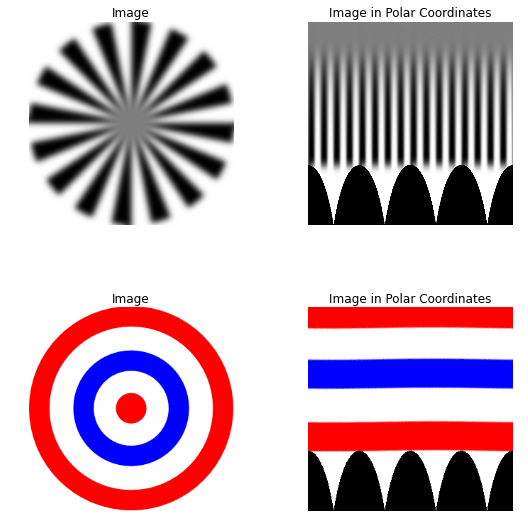

In [6]:
import numpy as np
import PIL
import pyradi.ryplot as ryplot
import pyradi.ryutils as ryutils

tgzFilename = 'Colored_Bullseye-wikipedia.tgz'
destinationDir = '.'
tarFilename = 'Colored_Bullseye-wikipedia.tar'
url = 'https://raw.githubusercontent.com/NelisW/pyradi/master/pyradi/data/'
dlNamesb = ryfiles.downloadUntar(tgzFilename, url, destinationDir, tarFilename)
print('filesAvailable are {}'.format(dlNamesb))

tgzFilename = 'siemensstar.tgz'
destinationDir = '.'
tarFilename = 'siemensstar.tar'
url = 'https://raw.githubusercontent.com/NelisW/pyradi/master/pyradi/data/'
dlNamess = ryfiles.downloadUntar(tgzFilename, url, destinationDir, tarFilename)
print('filesAvailable are {}'.format(dlNamess))

if dlNamesb and dlNamess:
    # see also reference images at http://sipi.usc.edu/database/
    datastar = np.array((PIL.Image.open('./600px-Siemens_star-blurred.png')).convert('RGB'))
    databull = np.array((PIL.Image.open('./Colored_Bullseye-wikipedia.png')).convert('RGB'))
    pim = ryplot.ProcessImage()
    polar_gridstar, _, _ = pim.reprojectImageIntoPolar(datastar, None, False)
    polar_gridbull, _, _  = pim.reprojectImageIntoPolar(databull, None, False)
    p = ryplot.Plotter(1,2,2)
    p.showImage(1, datastar, ptitle='Image')
    p.showImage(2, polar_gridstar, ptitle='Image in Polar Coordinates')
    p.showImage(3, databull, ptitle='Image')
    p.showImage(4, polar_gridbull, ptitle='Image in Polar Coordinates')

## Threshold image by interactive widgets

### Introduction

IPython 2.0 introduced interactive widgets that allows the creation of GUI widgets in the notebook.  The widgets are relatively simple to implement in notebook code.  The interactive widgets API support different layers of detail, providing increasing control at lower levels.

This notebook explores a very simple scenario where a slider is used to specify a threshold used to segment an image.

An excellent introduction to the IPython display system and interactive widgets was given at a recent PyData conference by Granger and Frederic.  The introduction provides IPython notebooks as well as videos of the presentations at the conference. 

Videos are here:  
<https://www.youtube.com/watch?v=VaV10VNZCLA>  
<https://www.youtube.com/watch?v=vE_CJTen15M>  
<https://www.youtube.com/watch?v=o7Tb7YhJZR0>  

IPython notebooks are also available.  Clone or download the complete repository at   
<https://github.com/ipython/ipython-in-depth>  
and then open the file `ipython-in-depth/examples/Interactive Widgets/Index.ipynb`   

Read at least the first two tutorials `Using Interact` and `Widget Basics`. There is much more to read, but these two should get you going.

<div class="alert alert-success">
As of IPython 2.0, the widgets in this notebook won't show up on http://nbviewer.ipython.org. To view the widgets and interact with them, you will need to download this notebook and run it with an IPython Notebook server.  See the Granger/Ferderic videos for more information.
</div>

### Segmenting an image

The following example loads an image file, sets up a slider and then display the segmented image and its statistical properties.

In [7]:
import IPython.html.widgets as widgets
from IPython.display import display
from scipy.misc import imread
import numpy as np
import pyradi.ryplot as ryplot

%matplotlib inline

:0: FutureWarning: IPython widgets are experimental and may change in the future.


Play with the two images to observe the effect of the different gray level distributions.

In [8]:
img = np.array(imread('images/peppers256.png', flatten=1))
# img = np.array(imread('images/AN148_C3.png', flatten=1))
print(img.shape[0], img.shape[1], img.shape[0]*img.shape[1])

(256, 256, 65536)


The following function does the image segmentation and will be called from widgets.interactive. The function is given the image and the threshold value to be used in the segmentation. The image is segmented and displayed inside this function - required because the image must be displayed every time the segmentation threshold is changed. The function returns the segmented image and threshold value for the image (these returns can be used subsequently elsewhere). The function displays the histogram of the segmented image, excluding the first bin, which contains the discarded elements, as well as the cumulative probability of the original input image. All this processing takes a while, so the software is sluggish for large images.

In [9]:
def threshold_image(image, thx):
    nimg = np.where(image > thx, image, 0)
    hist, bin = np.histogram(image,bins=128)
    hists, bin = np.histogram(nimg,bins=128)
    cumsum = np.cumsum(hist)/(np.ones(hist.shape) * image.shape[0]*image.shape[1])
    p = ryplot.Plotter(1,1,3,figsize=(18,6))
    p.showImage(1, nimg);
    p.plot(2,bin[2:], hists[1:],'', 'Gray level', 'Count');
    p.plot(3,bin[1:], cumsum,'', 'Gray level', 'Cummulative probability');
    p.plot(3,np.asarray([thx,thx]), np.asarray([0,1]));    
#     display(nimg)
    return nimg,thx

The `widgets.interactive` function is given three types of parameters:   
 - The first parameter is the name of the function to be called when the widget's states changes.
 - Any input data to be passed to the function (any number of parameters).  These inputs must be flagged as inputs by using `widgets.fixed()` function. If so flagged the parameters will not be interpreted as widgets, but as input data.
 - The definition of the widgets to be drawn and interrogated. All parameters not flagged as `widgets.fixed()` are interpreted as widget definitions, either in shorthand form or by explicit definition (see the Granger/Frederic notebooks).

In this case the function is `threshold_image`, and only one data item is passed `img`, and there a float slider widget ranging from 0 to 255, with step increment of 1.0. 

The `interactive` function is used and assigned to a variable.  This is necessary because later we want to use the variable to read the return values from the segmentation function.  The `display` function must be called on the widget variable to display the widget.  Once the widget is displayed, the user can change the slide value, which in turn calls the threshold function, which does the segmentation and displays the image.

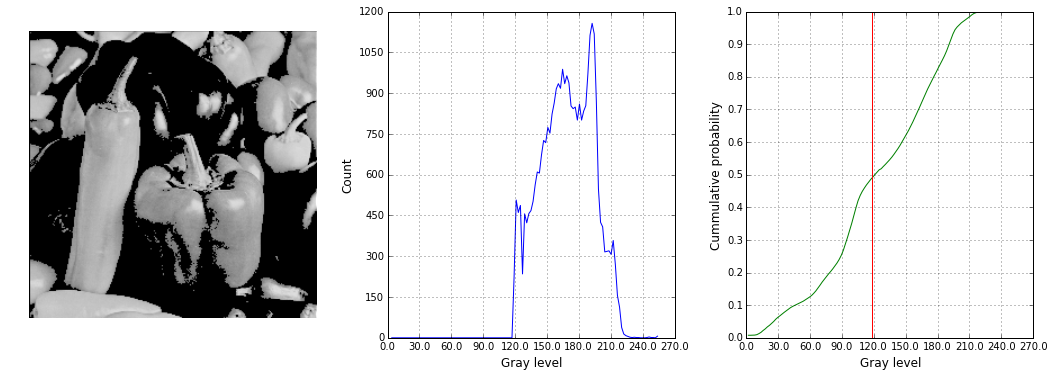

In [10]:
w = widgets.interactive(threshold_image, image=widgets.fixed(img), 
                thx=widgets.FloatSliderWidget(value=128, min=0.0, max=255.0, step=1))
display(w)

The segmentation function returns a segmented image and the value of the segmentation threshold. These values can be accessed after the slider has been moved, as the result attribute of the widget. The inputs to the segmentation function is available in the kwargs attribute.

In [11]:
#print current keyword arguments: the input image and the threshold
# print(w.kwargs)

#print function return values
print(type(w.result[0]))
print(type(w.result[1]))
print(w.result[1])
print(w.result[0])

<type 'numpy.ndarray'>
<type 'float'>
128.0
[[   0.    0.    0. ...,    0.    0.    0.]
 [   0.    0.    0. ...,  182.  172.  208.]
 [   0.    0.    0. ...,  183.  176.  211.]
 ..., 
 [   0.    0.    0. ...,  196.  194.  245.]
 [   0.  135.    0. ...,  202.  190.  243.]
 [   0.    0.    0. ...,  203.  191.  232.]]


## Python and [module versions, and dates](http://nbviewer.ipython.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-0-Scientific-Computing-with-Python.ipynb)

In [12]:
%load_ext version_information
%version_information numpy, scipy, matplotlib, pyradi

Software versions
Python 2.7.8 32bit [MSC v.1500 32 bit (Intel)]
IPython 3.0.0
OS Windows 7 6.1.7601 SP1
numpy 1.9.2
scipy 0.15.1
matplotlib 1.4.3
pyradi 0.1.55
Sun Apr 05 21:59:21 2015 South Africa Standard Time